# <font color='red'> Spoken Digit Recognition</font>


In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>Instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. Please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>



In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import os
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Input, BatchNormalization, Dropout, LSTM, Dense, AveragePooling2D, GlobalAveragePooling2D, AveragePooling1D, InputLayer, GlobalAveragePooling1D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
tf.keras.backend.clear_session()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import glob
from joblib import Parallel, delayed
import time
import librosa.display
from collections import Counter
##if you need any imports you can do that here. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We shared recordings.zip, please unzip those. 

In [3]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
path = '/content/drive/MyDrive/Audio_Spoken_Digit/recordings'
all_files = []
for files in os.listdir(path):
    names = os.path.join(path, files)
    all_files.append(names)
all_files

['/content/drive/MyDrive/Audio_Spoken_Digit/recordings/7_jackson_20.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/3_theo_15.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/0_yweweler_1.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/0_yweweler_10.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/9_jackson_34.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/5_jackson_12.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/7_yweweler_8.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/8_jackson_6.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/3_jackson_21.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/5_yweweler_2.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/2_yweweler_8.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/6_jackson_46.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digit/recordings/1_jackson_6.wav',
 '/content/drive/MyDrive/Audio_Spoken_Digi

<font size=4>Grader function 1 </font>

In [4]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [5]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
label = []
for files in os.listdir(path):
    label.append(files[0])
len(label) 

2000

In [6]:
df_audio = pd.DataFrame(list(zip(all_files, label)), columns = ['path', 'label'])
df_audio

,path,label
0,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,7
1,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,3
2,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,0
3,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,0
4,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,9
...,...,...
1995,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,2
1996,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,3
1997,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,3
1998,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,0


In [7]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## Exploring the sound dataset

In [ ]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

Counter({'7': 200, '3': 200, '0': 200, '9': 200, '5': 200, '8': 200, '2': 200, '6': 200, '1': 200, '4': 200})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


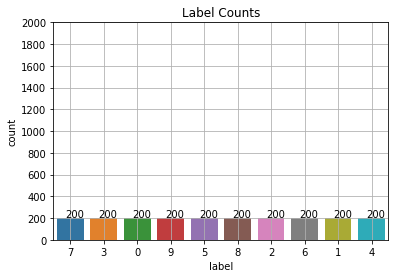

In [8]:
# Count of Labels.
total = len(df_audio)
print(Counter(df_audio['label']))
ax = sns.countplot(df_audio['label'])
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
plt.grid(True)
plt.title("Label Counts")
plt.show()

## Creating dataframe

In [9]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0

label = []
for files in os.listdir(path):
    label.append(files[0])
len(label) 

2000

In [10]:
df_audio = pd.DataFrame(list(zip(all_files, label)), columns = ['path', 'label'])
df_audio

,path,label
0,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,7
1,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,3
2,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,0
3,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,0
4,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,9
...,...,...
1995,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,2
1996,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,3
1997,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,3
1998,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,0


In [ ]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [12]:
df_audio.describe()

,path,label
count,2000,2000
unique,2000,10
top,/content/drive/MyDrive/Audio_Spoken_Digit/reco...,3
freq,1,200


<font size=4>Grader function 2 </font>

In [13]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [14]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [15]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%

X = df_audio['path']
Y = df_audio['label'].astype("int32")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400,), (600,), (1400,), (600,))

<font size=4>Grader function 3 </font>

In [16]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [17]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [18]:
# Using Parallel jobs to get the samples and duration for train and test.
a = Parallel(n_jobs=-1, verbose = 1)(delayed(load_wav)(train) for train in X_train) 
b = Parallel(n_jobs=-1, verbose = 1)(delayed(load_wav)(test) for test in X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:   44.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.9s finished


In [19]:
Train_samples = []
Train_duration = []
Test_samples = []
Test_duration = []

In [20]:
a = np.array(a)
Train_samples = a[:,0].tolist()
Train_duration = a[:,1].tolist()
a.dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


dtype('O')

In [21]:
a = np.array(a)
Train_samples = a[:,0].tolist()
Train_duration = a[:,1].tolist()

In [22]:
b = np.array(b)
Test_samples = b[:,0].tolist()
Test_duration = b[:,1].tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [23]:
len(Train_samples), len(Test_samples)

(1400, 600)

In [24]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train

X_train_processed = pd.DataFrame(list(zip(Train_samples, Train_duration)), columns = ['raw_data', 'duration'])
X_test_processed = pd.DataFrame(list(zip(Test_samples, Test_duration)), columns = ['raw_data', 'duration'])
X_train_processed.shape, X_test_processed.shape

((1400, 2), (600, 2))

In [25]:
del a
del b

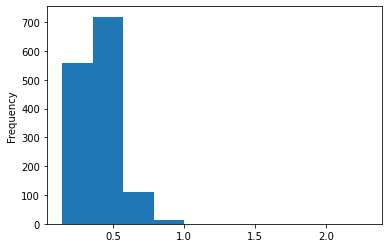

In [26]:
# plot the histogram of the duration for train
X_train_processed['duration'].plot.hist()

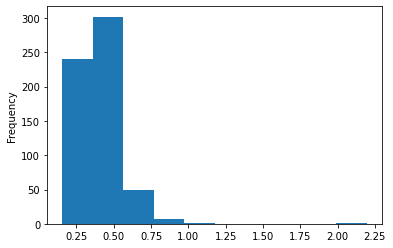

In [27]:
# plot the histogram of the duration for test
X_test_processed['duration'].plot.hist()

[]

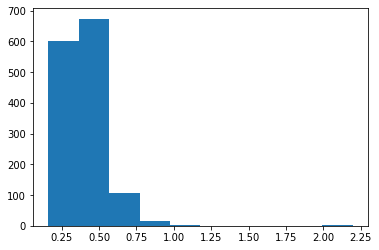

In [ ]:
#plot the histogram of the duration for trian


(array([224., 320.,  50.,   5.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.14353741, 0.35746032, 0.57138322, 0.78530612, 0.99922902,
        1.21315193, 1.42707483, 1.64099773, 1.85492063, 2.06884354,
        2.28276644]),
 <a list of 10 Patch objects>)

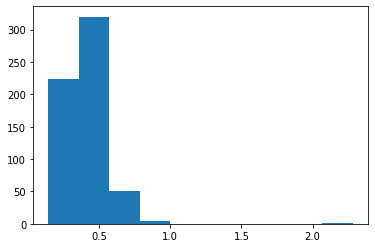

In [ ]:
#plot the histogram of the duration for trian


In [28]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 

for i in range(0, 101, 10):
    per = np.percentile(X_train_processed['duration'], i)
    print(i, 'th percentile is ', per)

0 th percentile is  0.1435374149659864
10 th percentile is  0.2591020408163265
20 th percentile is  0.29586394557823126
30 th percentile is  0.32875283446712017
40 th percentile is  0.357859410430839
50 th percentile is  0.3873922902494331
60 th percentile is  0.4164172335600907
70 th percentile is  0.44616780045351473
80 th percentile is  0.48144217687074836
90 th percentile is  0.555297052154195
100 th percentile is  2.282766439909297


In [29]:
# Print 90 to 100 percentile values with step size of 1 for train data duration.

for i in range(90, 101):
    per = np.percentile(X_train_processed['duration'], i)
    print(i, 'th percentile is ', per)

90 th percentile is  0.555297052154195
91 th percentile is  0.5679238095238096
92 th percentile is  0.5795482993197282
93 th percentile is  0.5941251700680278
94 th percentile is  0.6133478458049886
95 th percentile is  0.628310657596372
96 th percentile is  0.6431455782312925
97 th percentile is  0.6611179138321994
98 th percentile is  0.6925750566893424
99 th percentile is  0.784215873015873
100 th percentile is  2.282766439909297


<font size=4>Grader function 4 </font>

In [30]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [31]:
max_length  = 17640

In [ ]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

In [32]:
X_train_mask = np.array([np.ones(g.shape[0]) for g in X_train_processed['raw_data'].values])
X_train_mask.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(1400,)

In [33]:
X_test_mask = np.array([np.ones(g.shape[0]) for g in X_test_processed['raw_data'].values])
X_test_mask.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(600,)

In [34]:
X_train_mask[-50].shape, X_train_processed['raw_data'].values[-50].shape

((5612,), (5612,))

In [35]:
#X_train_pad_seq & X_train_mask:

X_train_pad_seq = pad_sequences(X_train_processed['raw_data'], maxlen=max_length, padding='post', dtype = np.float32, truncating='post')
X_train_mask = pad_sequences(X_train_mask, maxlen=max_length, padding='post', dtype = bool, truncating='post')


In [36]:
#X_test_pad_seq & X_test_mask:

X_test_pad_seq = pad_sequences(X_test_processed['raw_data'], maxlen=max_length, padding='post', dtype = np.float32, truncating='post')
X_test_mask = pad_sequences(X_test_mask, maxlen=max_length, padding='post', dtype = bool, truncating='post')

In [37]:
X_test_pad_seq

array([[-1.26367854e-02, -1.55794946e-02, -1.13195395e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.18654723e-04, -2.41128844e-04, -2.04156895e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.05007842e-05, -7.15753195e-05, -4.50172411e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.53095997e-03,  2.04080902e-03,  2.03249208e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.05277140e-04,  1.56983704e-04, -3.24962894e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.44123731e-02, -3.74546014e-02, -4.49726209e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype=float32)

In [38]:
X_test_mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

<font size=4>Grader function 5 </font>

In [39]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

In [40]:
# Changing the dimension.
X_T_pad = tf.expand_dims(X_train_pad_seq, axis = 2)
X_T_pad.shape, X_T_pad[0].shape

(TensorShape([1400, 17640, 1]), TensorShape([17640, 1]))

In [41]:
X_Te_pad = tf.expand_dims(X_test_pad_seq, axis = 2)
X_Te_pad.shape, X_Te_pad[0].shape

(TensorShape([600, 17640, 1]), TensorShape([17640, 1]))

In [42]:
Train = [X_T_pad, X_train_mask]
Val = [X_Te_pad, X_test_mask]

In [43]:
Train_data = (Train, y_train.values)
Val_data = (Val, y_test.values)

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [44]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [45]:
tf.keras.backend.clear_session()
class Metrics(tf.keras.callbacks.Callback):
    
    def __init__(self, x = None, y = None):
        self.training_data = x 
        self.validation_data = y
    
    def on_train_begin(self, logs = {}):
        ## on begin of training, we are creating a instance varible called history
        self.history={'train_f1_score': [], 'val_f1_score': []}

        
    def on_epoch_end(self, epoch, logs = {}):
        ## on end of each epoch, we will get logs and update the self.history dict
        train_predict = self.model.predict(self.training_data[0], batch_size = 50)
        train_bin = np.argmax(train_predict, axis = 1)
        train_targ = self.training_data[1]
        _train_f1 = f1_score(train_targ, train_bin, average = 'micro')
       
         
        val_predict = self.model.predict(self.validation_data[0], batch_size = 50)
        val_bin = np.argmax(val_predict, axis = 1)
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_bin, average = 'micro')
             
        self.history['val_f1_score'].append(_val_f1)
        self.history['train_f1_score'].append(_train_f1)
        
        print(' - train_f1_score : ', _train_f1, ' - val_f1_score : ', _val_f1)
        return

In [47]:
def changeLearningRate(epoch):
    global initial_learningrate
    epoch = epoch + 1
    if epoch % 5 == 0:
        initial_learningrate *= 0.55
    return initial_learningrate

In [48]:
import os
save = 'model_save/*.hdf5'
r = glob.glob(save)
for i in r:
    os.remove(i)

In [49]:
filepath="model_save/model-{epoch:02d}-{val_sparse_categorical_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_sparse_categorical_accuracy',  verbose=1, save_best_only=True, mode='max')
reducelr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.001, patience = 1, verbose = 1, mode = 'min')

lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
initial_learningrate=0.001

In [50]:
metrics = Metrics(Train_data, Val_data)
callbacks = [metrics, checkpoint, reducelr, lrschedule]
reg = tf.keras.regularizers.L2(l2=0.01)

In [51]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool

input_layer = Input(shape=(17640,1), name = 'input_layer')
input_mask = Input(shape=(17640,), name = 'mask_layer', dtype=bool)
ls = LSTM(units = 128, name = 'LSTM')(input_layer, mask = input_mask)
ls = BatchNormalization()(ls)
dc1 = Dense(512,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed = 30), name = 'FC2')(ls)
dc1 = Dropout(0.35)(dc1)
out = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed = 30), name = 'FC3')(dc1)


In [52]:
model_raw1 = Model(inputs = [input_layer,input_mask], outputs = out)

In [53]:
model_raw1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_layer (InputLayer)        [(None, 17640)]      0           []                               
                                                                                                  
 LSTM (LSTM)                    (None, 128)          66560       ['input_layer[0][0]',            
                                                                  'mask_layer[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 128)         512         ['LSTM[0][0]']               

In [54]:
model_raw1.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [ ]:
#train your model
#model1.fit([X_train_pad_seq,X_train_mask],y_train_int,.........)s
model_history = model_raw1.fit(Train, y_train.values, batch_size = 40, validation_data = (Val, y_test.values), epochs = 6, verbose = 1, callbacks = callbacks)



Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/6
35/35 [==============================] - ETA: 0s - loss: 2.3078 - sparse_categorical_accuracy: 0.0914  - train_f1_score :  0.09857142857142857  - val_f1_score :  0.10000000000000002

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.10000, saving model to model_save/model-01-0.1000.hdf5
35/35 [==============================] - 1411s 41s/step - loss: 2.3078 - sparse_categorical_accuracy: 0.0914 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/6
35/35 [==============================] - ETA: 0s - loss: 2.3014 - sparse_categorical_accuracy: 0.0950  - train_f1_score :  0.10142857142857142  - val_f1_score :  0.10000000000000002

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.10000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1.0000000474974512e-06.
35/35 [========

In [55]:
model_raw1.save('Model_raw_1_0.1517_final.h5')

In [56]:
model_raw1 = load_model('/content/Model_raw_1_0.1517_final.h5')

In [57]:
## as discussed above, please write the LSTM
y_pred = model_raw1.predict(Val)
y_pred = np.argmax(y_pred, axis = 1)

In [58]:
print('Classification Report')
print(classification_report(y_test.values, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.11      0.02      0.03        60
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        60
           4       0.10      0.57      0.17        60
           5       0.12      0.30      0.17        60
           6       0.67      0.03      0.06        60
           7       0.17      0.02      0.03        60
           8       0.23      0.28      0.25        60
           9       0.00      0.00      0.00        60

    accuracy                           0.12       600
   macro avg       0.14      0.12      0.07       600
weighted avg       0.14      0.12      0.07       600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

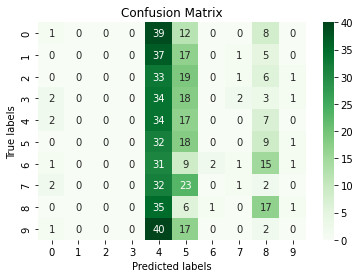

In [59]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test.values, y_pred), annot=True, ax = ax, fmt='g', cmap='Greens') #annot=True to annotate cells

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 

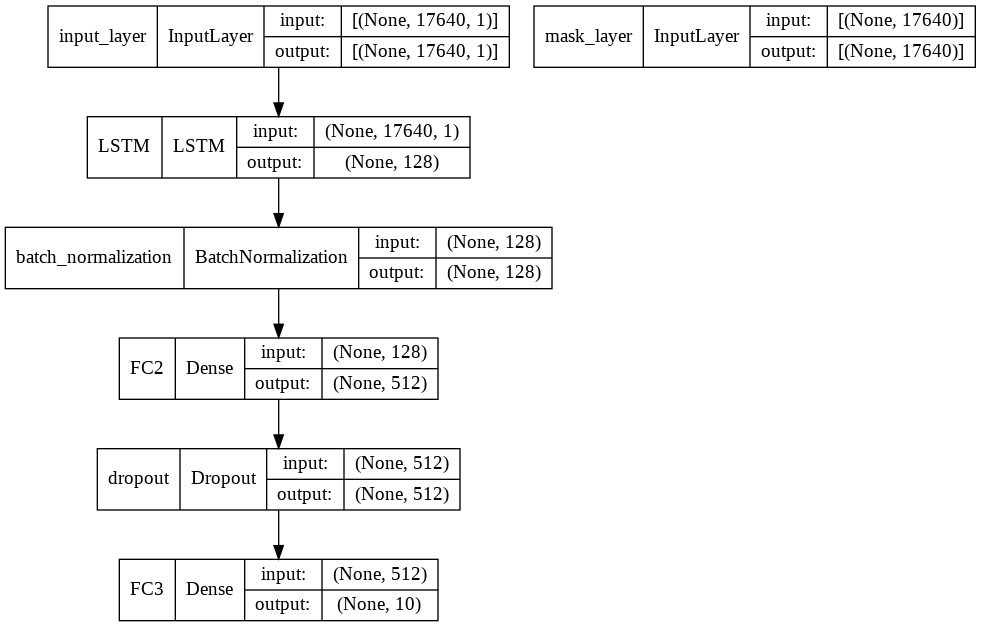

In [60]:
plot_model(model_raw1, show_shapes=True, show_layer_names=True)

### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [61]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [62]:
###use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
#X_train_spectrogram:
X_train_spectrogram = []
for j in X_train_pad_seq:
    l = convert_to_spectrogram(j)
    X_train_spectrogram.append(l)
X_train_spectrogram = np.array(X_train_spectrogram) 

In [63]:
#X_test_spectrogram:
X_test_spectrogram = []
for j in X_test_pad_seq:
    l = convert_to_spectrogram(j)
    X_test_spectrogram.append(l)
X_test_spectrogram = np.array(X_test_spectrogram)

<Figure size 432x288 with 0 Axes>

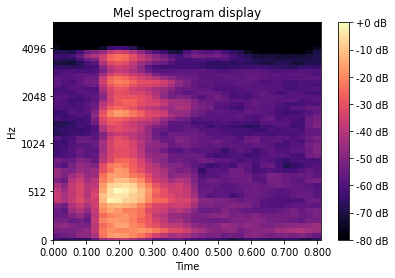

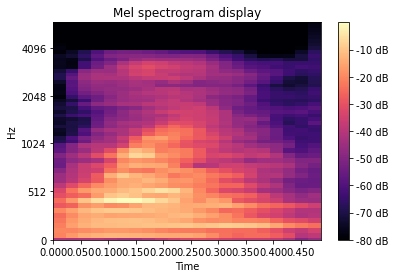

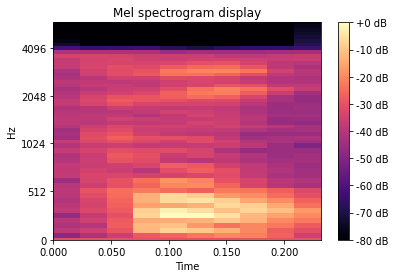

In [64]:
plt.subplots_adjust(wspace=1, hspace=1)
for i in range(0,3):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(convert_to_spectrogram(X_train_processed['raw_data'][i]), y_axis='mel', x_axis='time', ax=ax)
    ax.set(title='Mel spectrogram display')
    ax.set_ylim([0,6000])
    fig.colorbar(img, ax=ax, format="%+2.f dB")

<font size=4>Grader function 6 </font>

In [65]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True


Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [66]:
tf.keras.backend.clear_session()
reg = tf.keras.regularizers.L2(l2=1.5)

In [67]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above
tf.keras.backend.clear_session()
input_layer = Input(shape=(64,35), name = 'input_layer')
ls = LSTM(units = 128, name = 'LSTM', return_sequences = True)(input_layer)
ad = GlobalAveragePooling1D()(ls)
dc1 = Dense(1024,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed = 30), name = 'FC1')(ad)
dc1 = Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed = 30), name = 'FC2')(dc1)
dc1 = BatchNormalization()(dc1)
dc1 = Dropout(0.6899)(dc1)
out = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed = 30), name = 'FC3')(dc1)

In [68]:
m_spec = Model(inputs = input_layer, outputs = out)

In [69]:
m_spec.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64, 35)]          0         
                                                                 
 LSTM (LSTM)                 (None, 64, 128)           83968     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 FC1 (Dense)                 (None, 1024)              132096    
                                                                 
 FC2 (Dense)                 (None, 256)               262400    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                               

In [70]:
save = 'model_spec_save/*.hdf5'
r = glob.glob(save)
for i in r:
    os.remove(i)

In [71]:
filepath="model_spec_save/model-{epoch:02d}-{val_sparse_categorical_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_sparse_categorical_accuracy',  verbose=1, save_best_only=True, mode='max')
reducelr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.055, patience = 1, verbose = 1, mode = 'min')

lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
initial_learningrate=0.001

In [72]:
Train_data_spec = [X_train_spectrogram, y_train.values]
Test_data_spec = [X_test_spectrogram, y_test.values]
metrics = Metrics(Train_data_spec, Test_data_spec)
callbacks = [metrics, checkpoint, reducelr, lrschedule]

In [74]:
#compile and fit your model.
#model2.fit([X_train_spectrogram],y_train_int,......)
m_spec.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [76]:
tf.keras.backend.clear_session()
model_spec_history = m_spec.fit(X_train_spectrogram, y_train.values, batch_size =50, validation_data = (X_test_spectrogram, y_test.values), epochs=50, verbose=1, callbacks=callbacks)



Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 2.6115 - sparse_categorical_accuracy: 0.2186 - train_f1_score :  0.10499999999999998  - val_f1_score :  0.10833333333333334

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.10833, saving model to model_spec_save/model-01-0.1083.hdf5
28/28 [==============================] - 8s 220ms/step - loss: 2.6115 - sparse_categorical_accuracy: 0.2186 - val_loss: 2.5303 - val_sparse_categorical_accuracy: 0.1083 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 2.1032 - sparse_categorical_accuracy: 0.3086 - train_f1_score :  0.10000000000000002  - val_f1_score :  0.10000000000000002

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.10833

Epoch 00002: ReduceLROnPlateau reducing learning rate to 5.500000261235982e-05.
28/28 [=====

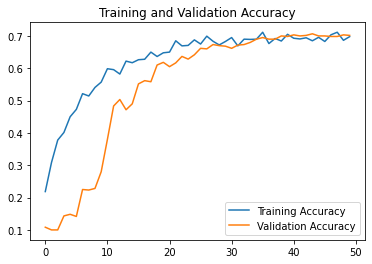

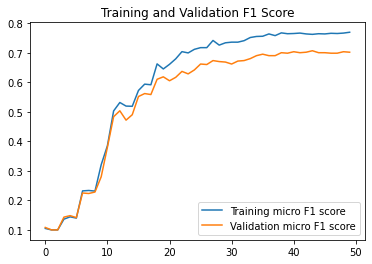

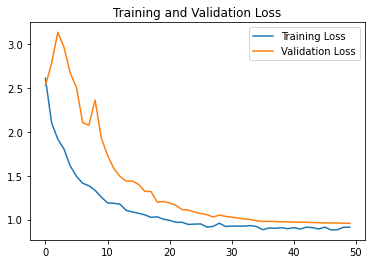

In [77]:
acc = model_spec_history.history['sparse_categorical_accuracy']
val_acc = model_spec_history.history['val_sparse_categorical_accuracy']

loss = model_spec_history.history['loss']
val_loss = model_spec_history.history['val_loss']

f1 = metrics.history['train_f1_score']
val_f1 = metrics.history['val_f1_score']

epochs_range = range(50)

#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range, f1, label='Training micro F1 score')
plt.plot(epochs_range, val_f1, label='Validation micro F1 score')
plt.legend(loc='lower right')
plt.title('Training and Validation F1 Score')
plt.show()

#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [78]:
model_raw1.save('Model_raw_1_0.1517_final.h5')

In [79]:
model_raw1 = load_model('/content/Model_raw_1_0.1517_final.h5')

In [80]:
## as discussed above, please write the LSTM
y_pred = m_spec.predict(X_test_spectrogram)
y_pred = np.argmax(y_pred, axis = 1)

In [81]:
print('Classification Report')
print(classification_report(y_test.values, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        60
           1       0.70      0.78      0.74        60
           2       0.51      0.75      0.61        60
           3       0.65      0.43      0.52        60
           4       0.80      0.78      0.79        60
           5       0.69      0.70      0.69        60
           6       0.75      0.70      0.72        60
           7       0.67      0.62      0.64        60
           8       0.77      0.72      0.74        60
           9       0.78      0.83      0.81        60

    accuracy                           0.70       600
   macro avg       0.71      0.70      0.70       600
weighted avg       0.71      0.70      0.70       600



Text(0.5, 1.0, 'Confusion Matrix')

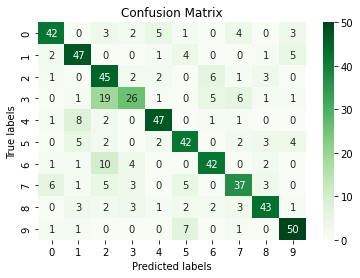

In [82]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test.values, y_pred), annot=True, ax = ax, fmt='g', cmap='Greens') #annot=True to annotate cells

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 

In [83]:
m_spec.save('Model_Spect_1_0.805_final.h5')

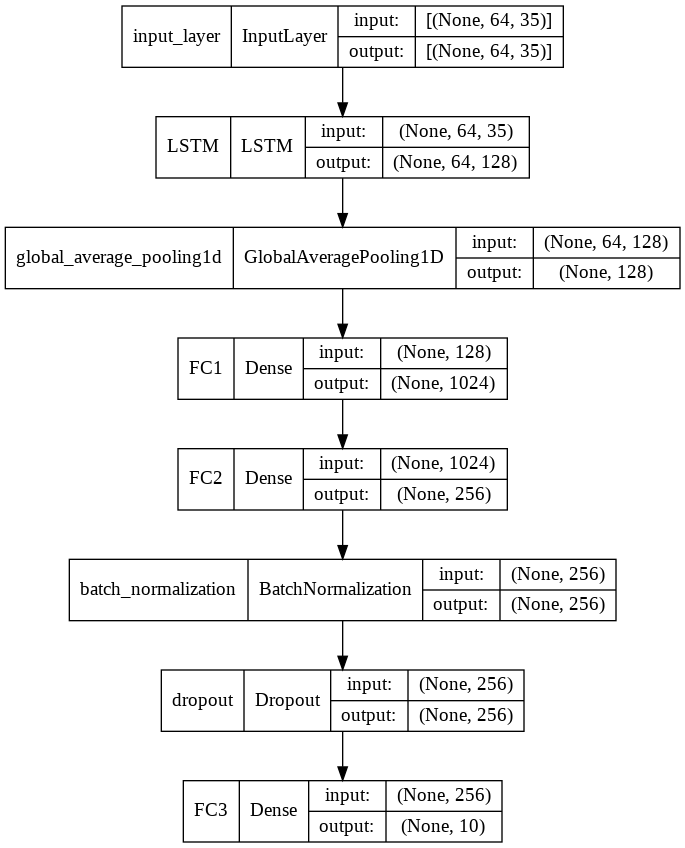

In [84]:
m_spec = load_model('/content/Model_Spect_1_0.805_final.h5')
plot_model(m_spec, show_shapes=True, show_layer_names=True)

### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [85]:
## generating augmented data. 
def generate_augmented_data(file_path, label):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    augmented_data.append(samples)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data, np.full(len(augmented_data), label)

In [86]:
Y = df_audio['label'].astype("int32")

In [87]:
temp_path, temp_lab = df_audio.iloc[1].path, Y.iloc[1]
aug_temp1,auj= generate_augmented_data(temp_path, temp_lab)

## Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



In [88]:
X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],random_state=45,test_size=0.2,stratify=df_audio['label'])

3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

<font color='red'> Note </font> - While fitting your model on the augmented data for model 3 you might face Resource exhaust error. One simple hack to avoid that is save the augmented_train_data,augment_y_train,test_data and y_test to Drive or into your local system. Then restart the runtime so that now you can train your model with full RAM capacity. Upload these files again in the new runtime session perform padding and masking and then fit your model.

In [89]:
a = Parallel(n_jobs=-1, verbose = 1)(delayed(generate_augmented_data)(i, j) for i, j in (X_train,y_train)) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.8min finished


In [90]:
a = np.array(a)
New_samples = a[:,0].ravel()
New_labels = a[:,1].astype('int32').ravel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [91]:
len(New_samples), len(New_labels)

(20000, 20000)

In [92]:
# Shuffling the above dataset, don't change the random state
New_samples, New_labels = shuffle(New_samples, New_labels, random_state=33)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(New_samples, New_labels, test_size = 0.3, stratify = New_labels, random_state = 45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000,), (6000,), (14000,), (6000,))

In [94]:
X_train_mask = np.array([np.ones(g.shape[0]) for g in X_train])
X_train_mask.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(14000,)

In [95]:
X_test_mask = np.array([np.ones(g.shape[0]) for g in X_test])
X_test_mask.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(6000,)

In [96]:
max_length  = 17640
X_train_mask[-50].shape, X_train[-50].shape

((7770,), (7770,))

In [97]:
X_train_pad_seq = pad_sequences(X_train, maxlen=max_length, padding='post', dtype = np.float32, truncating='post')
X_train_mask = pad_sequences(X_train_mask, maxlen=max_length, padding='post', dtype = bool, truncating='post')

In [98]:
X_test_pad_seq = pad_sequences(X_test, maxlen=max_length, padding='post', dtype = np.float32, truncating='post')
X_test_mask = pad_sequences(X_test_mask, maxlen=max_length, padding='post', dtype = bool, truncating='post')

In [99]:
X_test_mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [100]:
X_T_pad = tf.expand_dims(X_train_pad_seq, axis = 2)
X_T_pad.shape, X_T_pad[0].shape

(TensorShape([14000, 17640, 1]), TensorShape([17640, 1]))

In [101]:
X_Te_pad = tf.expand_dims(X_test_pad_seq, axis = 2)
X_Te_pad.shape, X_Te_pad[0].shape

(TensorShape([6000, 17640, 1]), TensorShape([17640, 1]))

In [102]:
td1 = tf.data.Dataset.from_tensor_slices((X_T_pad, X_train_mask))
td2 = tf.data.Dataset.from_tensor_slices((y_train))
td = tf.data.Dataset.zip((td1, td2))

In [103]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 100
train_dataset = td.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [104]:
td1 = tf.data.Dataset.from_tensor_slices((X_Te_pad, X_test_mask))
td2 = tf.data.Dataset.from_tensor_slices((y_test))
td = tf.data.Dataset.zip((td1, td2))

In [105]:
test_dataset = td.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [106]:
Train = [X_T_pad, X_train_mask]
Val = [X_Te_pad, X_test_mask]

In [107]:
Train_data = (Train, y_train)
Val_data = (Val, y_test)

In [108]:
del a

In [109]:
#Model:3- Data augmentation with raw features:

tf.keras.backend.clear_session()
class Metrics(tf.keras.callbacks.Callback):
    
    def __init__(self, x = None, y = None):
        self.training_data = x 
        self.validation_data = y
    
    def on_train_begin(self, logs = {}):
        ## on begin of training, we are creating a instance varible called history
        self.history={'train_f1_score': [], 'val_f1_score': []}

        
    def on_epoch_end(self, epoch, logs = {}):
        ## on end of each epoch, we will get logs and update the self.history dict
        train_predict = self.model.predict(self.training_data[0], batch_size = 128)
        train_bin = np.argmax(train_predict, axis = 1)
        train_targ = self.training_data[1]
        _train_f1 = f1_score(train_targ, train_bin, average = 'micro')
        
         
        val_predict = self.model.predict(self.validation_data[0], batch_size = 128)
        val_bin = np.argmax(val_predict, axis = 1)
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_bin, average = 'micro')
             
        self.history['val_f1_score'].append(_val_f1)
        self.history['train_f1_score'].append(_train_f1)
        
        print(' - train_f1_score : ', _train_f1, ' - val_f1_score : ', _val_f1)
        return


In [110]:
def changeLearningRate(epoch):
    global initial_learningrate
    epoch = epoch + 1
    if epoch % 5 == 0:
        initial_learningrate *= 0.55
    return initial_learningrate

In [111]:
import os
save = 'model_aug_raw_save/*.hdf5'
r = glob.glob(save)
for i in r:
    os.remove(i)

In [112]:
filepath="model_aug_raw_save/model-{epoch:02d}-{val_sparse_categorical_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_sparse_categorical_accuracy',  verbose=1, save_best_only=True, mode='max')
reducelr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.001, patience = 1, verbose = 1, mode = 'min')

lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
initial_learningrate=0.001

In [113]:
metrics = Metrics(Train_data, Val_data)
callbacks = [metrics, checkpoint, reducelr, lrschedule]
reg = tf.keras.regularizers.L2(l2=0.01)

In [114]:
tf.keras.backend.clear_session()
input_layer = Input(shape=(17640,1), name = 'input_layer')
input_mask = Input(shape=(17640,), name = 'mask_layer', dtype=bool)
ls = LSTM(units = 128, name = 'LSTM')(input_layer, mask = input_mask)
ls = BatchNormalization()(ls)
dc1 = Dense(512,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed = 30), name = 'FC2')(ls)
dc1 = Dropout(0.35)(dc1)
out = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed = 30), name = 'FC3')(dc1)

In [115]:
model_aug_raw = Model(inputs = [input_layer,input_mask], outputs = out)

In [116]:
model_aug_raw.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_layer (InputLayer)        [(None, 17640)]      0           []                               
                                                                                                  
 LSTM (LSTM)                    (None, 128)          66560       ['input_layer[0][0]',            
                                                                  'mask_layer[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 128)         512         ['LSTM[0][0]']               

In [117]:
model_aug_raw.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [118]:
train_steps = X_train.shape[0]//100
valid_steps = X_test.shape[0]//100
train_steps

140

In [ ]:
#tf.keras.backend.clear_session()
model_spec_history = m_spec.fit(X_train_spectrogram, y_train.values, batch_size =50, validation_data = (X_test_spectrogram, y_test.values), epochs=50, verbose=1, callbacks=callbacks)

#model_history = model_aug_raw.fit(train_dataset, validation_data = test_dataset, epochs = 5, verbose = 1, callbacks = callbacks)


Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 2.7174 - sparse_categorical_accuracy: 0.2114 - train_f1_score :  0.13214285714285715  - val_f1_score :  0.13

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.13000, saving model to model_spec_save/model-01-0.1300.hdf5
28/28 [==============================] - 8s 225ms/step - loss: 2.7174 - sparse_categorical_accuracy: 0.2114 - val_loss: 2.7606 - val_sparse_categorical_accuracy: 0.1300 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 2.0904 - sparse_categorical_accuracy: 0.3350 - train_f1_score :  0.12642857142857142  - val_f1_score :  0.12833333333333333

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.13000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 5.500000261235982e-05.
28/28 [====================

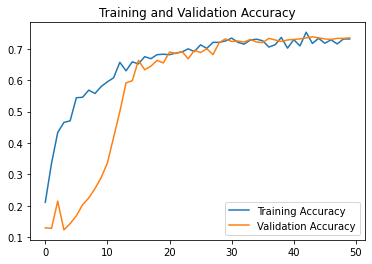

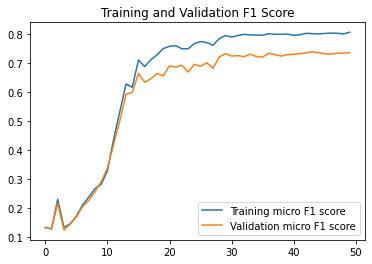

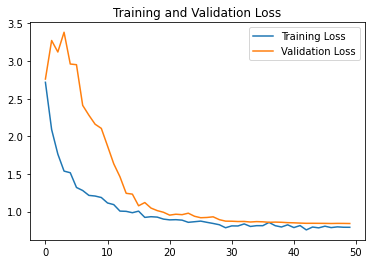

In [ ]:
acc = model_spec_history.history['sparse_categorical_accuracy']
val_acc = model_spec_history.history['val_sparse_categorical_accuracy']

loss = model_spec_history.history['loss']
val_loss = model_spec_history.history['val_loss']

f1 = metrics.history['train_f1_score']
val_f1 = metrics.history['val_f1_score']

epochs_range = range(50)

#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range, f1, label='Training micro F1 score')
plt.plot(epochs_range, val_f1, label='Validation micro F1 score')
plt.legend(loc='lower right')
plt.title('Training and Validation F1 Score')
plt.show()

#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_aug_raw.save('Model_Aug_raw_2_0.1795_final.h5')

In [ ]:
model_raw1 = load_model('/content/Model_Aug_raw_2_0.1795_final.h5')

In [ ]:
y_pred = model_aug_raw.predict(Val)
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        60
           5       0.07      0.33      0.12        60
           6       0.19      0.08      0.12        60
           7       0.00      0.00      0.00        60
           8       0.03      0.02      0.02        60
           9       0.09      0.38      0.15        60

    accuracy                           0.08       600
   macro avg       0.04      0.08      0.04       600
weighted avg       0.04      0.08      0.04       600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

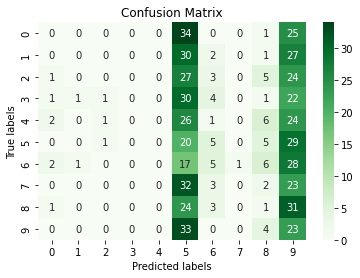

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g', cmap='Greens')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 

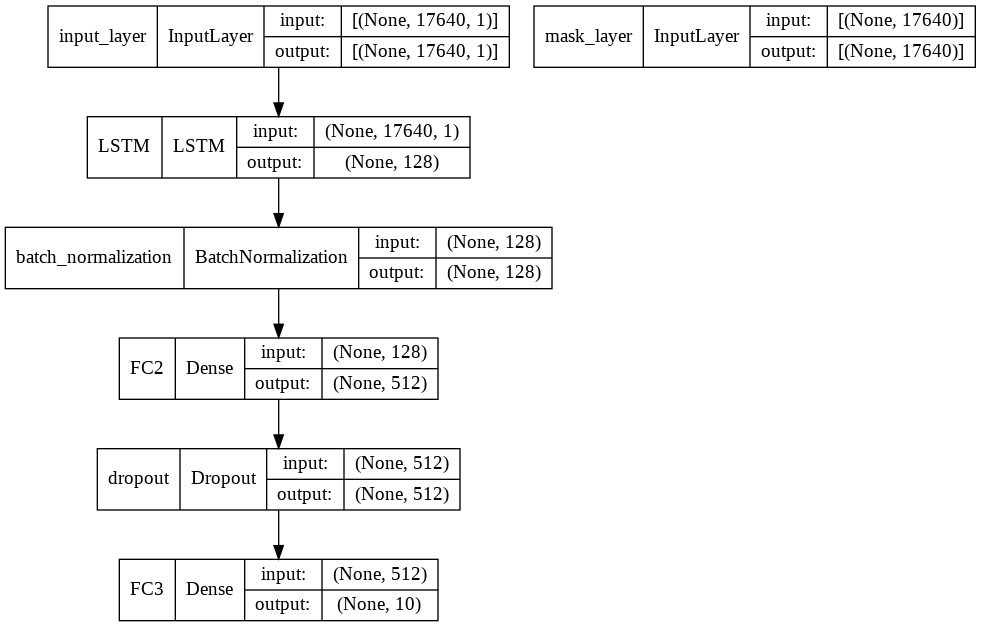

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_aug_raw, show_shapes=True, show_layer_names=True)

### 4. Data augmentation with spectogram data

---

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [ ]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [ ]:
X_train_spectrogram = []
for j in X_train_pad_seq:
    l = convert_to_spectrogram(j)
    X_train_spectrogram.append(l)
X_train_spectrogram = np.array(X_train_spectrogram) 

In [ ]:
X_test_spectrogram = []
for j in X_test_pad_seq:
    l = convert_to_spectrogram(j)
    X_test_spectrogram.append(l)
X_test_spectrogram = np.array(X_test_spectrogram)

In [ ]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(14000,64, 35)) and (X_test_spectrogram.shape == (6000, 64, 35))
    return flag_shape
grader_spectrogram()

False

In [ ]:
td1 = tf.data.Dataset.from_tensor_slices((X_train_spectrogram, y_train))

In [ ]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 100
train_spec_dataset = td1.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
td1 = tf.data.Dataset.from_tensor_slices((X_test_spectrogram, y_test))

In [ ]:
test_spec_dataset = td1.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
reg = tf.keras.regularizers.L2(l2=1.5)

In [ ]:
tf.keras.backend.clear_session()
input_layer = Input(shape=(64,35), name = 'input_layer')
ls = LSTM(units = 128, name = 'LSTM', return_sequences = True)(input_layer)
ad = GlobalAveragePooling1D()(ls)
dc1 = Dense(1024,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed = 30), name = 'FC1')(ad)
dc1 = Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed = 30), name = 'FC2')(dc1)
dc1 = BatchNormalization()(dc1)
dc1 = Dropout(0.6599)(dc1)
out = Dense(10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed = 30), name = 'FC3')(dc1)

In [ ]:
m_aug_spec = Model(inputs = input_layer, outputs = out)

In [ ]:
m_aug_spec.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64, 35)]          0         
                                                                 
 LSTM (LSTM)                 (None, 64, 128)           83968     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 FC1 (Dense)                 (None, 1024)              132096    
                                                                 
 FC2 (Dense)                 (None, 256)               262400    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                               

In [ ]:
save = 'model_aug_spec_save/*.hdf5'
r = glob.glob(save)
for i in r:
    os.remove(i)

In [ ]:
filepath="model_aug_spec_save/model-{epoch:02d}-{val_sparse_categorical_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_sparse_categorical_accuracy',  verbose=1, save_best_only=True, mode='max')
reducelr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.055, patience = 1, verbose = 1, mode = 'min')

lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
initial_learningrate=0.001


In [ ]:
Train_data_spec = [X_train_spectrogram, y_train]
Test_data_spec = [X_test_spectrogram, y_test]
metrics = Metrics(Train_data_spec, Test_data_spec)
callbacks = [metrics, checkpoint, reducelr, lrschedule]

In [ ]:
m_aug_spec.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [ ]:
model_spec_history = m_aug_spec.fit(train_spec_dataset, validation_data = test_spec_dataset, epochs=50, verbose=1, callbacks=callbacks)



Epoch 00001: LearningRateScheduler setting learning rate to 0.00055.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.1839 - sparse_categorical_accuracy: 0.5914 - train_f1_score :  0.28285714285714286  - val_f1_score :  0.2833333333333333

Epoch 00001: val_sparse_categorical_accuracy improved from 0.24667 to 0.28333, saving model to model_aug_spec_save/model-01-0.2833.hdf5
11/11 [==============================] - 4s 408ms/step - loss: 1.1839 - sparse_categorical_accuracy: 0.5914 - val_loss: 1.7935 - val_sparse_categorical_accuracy: 0.2833 - lr: 5.5000e-04

Epoch 00002: LearningRateScheduler setting learning rate to 0.00055.
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.1018 - sparse_categorical_accuracy: 0.6150 - train_f1_score :  0.29714285714285715  - val_f1_score :  0.3016666666666667

Epoch 00002: val_sparse_categorical_accuracy improved from 0.28333 to 0.30167, saving model to model_aug_spec_save/model-02-0.3017.hdf5
11/11 [===========

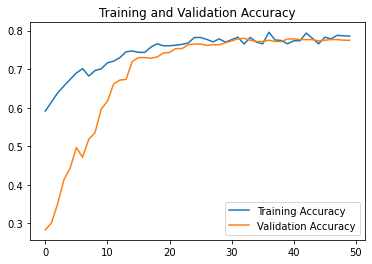

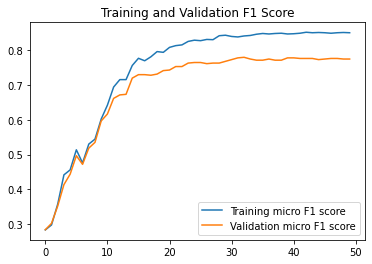

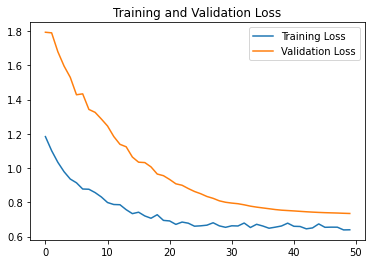

In [ ]:
acc = model_spec_history.history['sparse_categorical_accuracy']
val_acc = model_spec_history.history['val_sparse_categorical_accuracy']

loss = model_spec_history.history['loss']
val_loss = model_spec_history.history['val_loss']

f1 = metrics.history['train_f1_score']
val_f1 = metrics.history['val_f1_score']

epochs_range = range(50)

#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range, f1, label='Training micro F1 score')
plt.plot(epochs_range, val_f1, label='Validation micro F1 score')
plt.legend(loc='lower right')
plt.title('Training and Validation F1 Score')
plt.show()

#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## as discussed above, please write the LSTM
y_pred = m_aug_spec.predict(X_test_spectrogram)
y_pred = np.argmax(y_pred, axis = 1)
#p = p.round()

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        60
           1       0.81      0.83      0.82        60
           2       0.68      0.73      0.70        60
           3       0.58      0.62      0.60        60
           4       0.88      0.77      0.82        60
           5       0.77      0.80      0.79        60
           6       0.78      0.77      0.77        60
           7       0.76      0.62      0.68        60
           8       0.85      0.83      0.84        60
           9       0.86      0.92      0.89        60

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.77       600
weighted avg       0.78      0.78      0.77       600



Text(0.5, 1.0, 'Confusion Matrix')

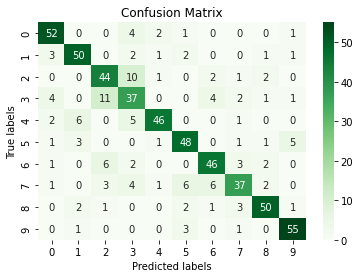

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g', cmap='Greens') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 

In [ ]:
m_aug_spec.save('Model_Aug_Spect_2_0.805_final.h5')

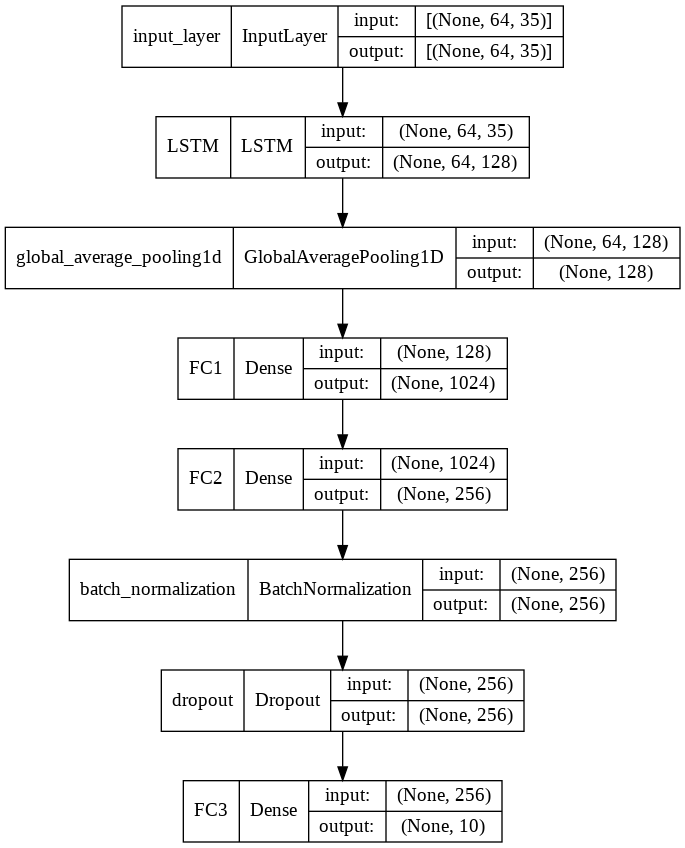

In [ ]:
plot_model(m_aug_spec, show_shapes=True, show_layer_names=True)


Observation:

1.   Micro F1 score for model 1 is: 0.10000000000
2.   Micro F1 score for model 2 is: 0.80241004573
3.   Micro F1 score for model 3 is: 0.10214937002
4.   Micro F1 score for model 4 is: 0.87520014689

Spectrogram data gives good F1 score than using raw data.

